# Vamos começar

$p(H|D) = \frac{p(D|H)p(H)}{p(D)}$

$p(H)$ : Priori
$p(D|H)$ : Likelihood
$p(H|D)$ : Posteriori
$p(D)$ : Evidence

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib.pyplot import figure

%matplotlib inline

# Problema da moeda



Text(0, 0.5, '$p(\\theta)$')

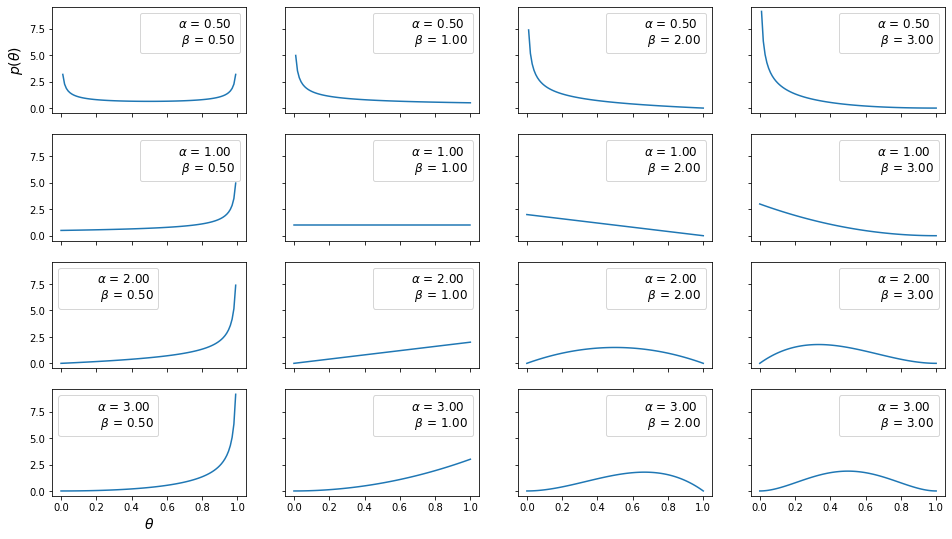

In [11]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True)
plt.rcParams["figure.figsize"] = [16,9]
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n $\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i,j].legend(fontsize=12)
ax[3,0].set_xlabel(r'$\theta$', fontsize=14)
ax[0,0].set_ylabel(r'$p(\theta)$', fontsize=14)


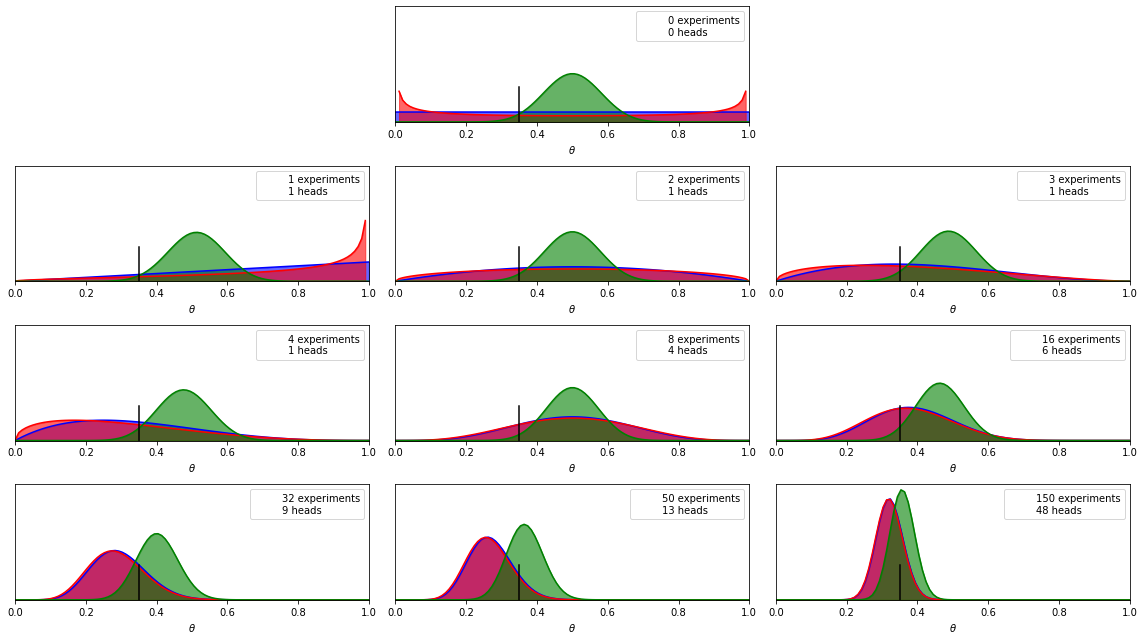

In [14]:
theta_real = 0.35
trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
beta_params = [(1, 1), (0.5, 0.5), (20, 20)]

dist = stats.beta
x = np.linspace(0, 1, 100)
for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r', 'g')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N,
     y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,12)
    plt.xlabel(r'$\theta$')
    plt.legend()
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.tight_layout()

On the first line we have 0 experiments done, hence these curves are just our priors. We have three curves, one per prior:

* The blue one is a uniform prior. This is equivalent to saying that all the possible values for the bias are equally probable a priori.

* The red one is similar to the uniform. For the sake of this example we will just say that we are a little bit more confident that the bias is either 0 or 1 than the rest of the values.


* The green and last one is centered and concentrated around 0.5, so this prior is compatible with information indicating that the coin has more or less about the same chance of landing heads or tails. We could also say this prior is compatible with the belief that most coins are fair. While such a word is commonly used in Bayesian discussions we think is better to talk about models that are informed by data.


The rest of the subplots show posteriors p(θ | y) for successive experiments. Remember that we can think of posteriors as updated priors given the data. The number of experiments (or coin tosses) and the number of heads are indicated in each subplot's legend. There is also a black vertical line at 0.35 representing the true value for θ

* Of course, in real problems we do not know this value, and it is here just for pedagogical reasons. This figure can teach us a lot about Bayesian analysis, so let's take a moment to understand it:

* The result of a Bayesian analysis is the posterior distribution, not a single value but a distribution of plausible values given the data and our model.

* The most probable value is given by the mode of the posterior (the peak of the distribution).

* The spread of the posterior is proportional to the uncertainty about the value of a parameter; the more spread the distribution, the less certain we are.

* Even when 1 = 4 = 0.5 it is easy to see that the uncertainty we have in the first 28 example is larger than in the second one because we have more data that supports our inference. This intuition is reflected in the posterior.

* Given a sufficiently large amount of data, two or more Bayesian models with different priors will tend to converge to the same result. In the limit of infinite data, no matter which prior we use, we will always get the same posterior. Remember that infinite is a limit and not a number, so from a practical point of view in some cases the infinite amount of data could be approximated with a really small number of data points

* How fast posteriors converge to the same distribution depends on the data and the model. In the previous figure we can see that the blue and red posteriors look almost indistinguishable after only 8 experiments, while the red curve continues to be separated from the other two even after 150 experiments.

* Something not obvious from the figure is that we will get the same result if we update the posterior sequentially than if we do it all at once. We can compute the posterior 150 times, each time adding one more observation and using the obtained posterior as the new prior, or we can just compute one posterior for the 150 tosses at once. The result will be exactly the same. This feature not only makes perfect sense, also leads to a natural way of updating our estimations when we get new data, a situation common in many data analysis problems.

(0.0, 1.0)

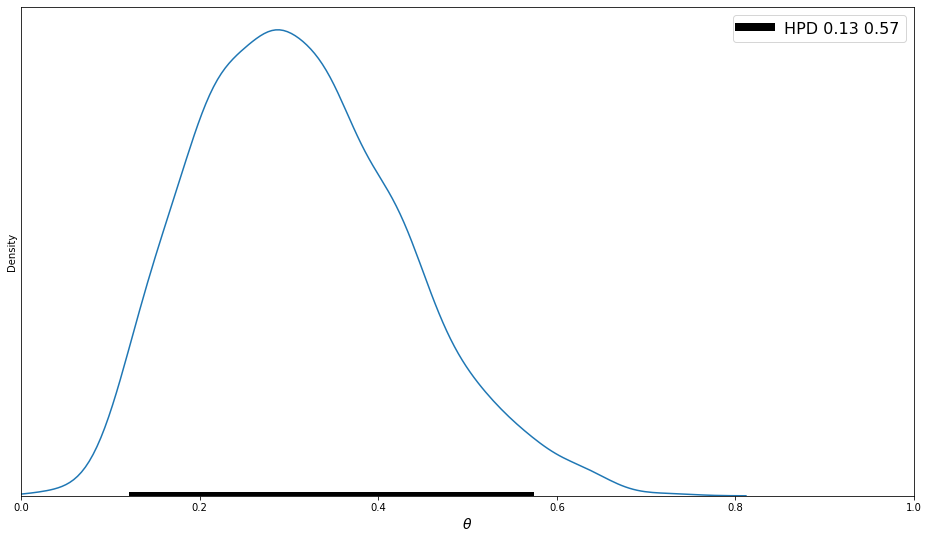

In [15]:
def naive_hpd(post):
    sns.kdeplot(post)
    HPD = np.percentile(post, [2.5, 97.5])
    plt.plot(HPD, [0, 0], label='HPD {:.2f} {:.2f}'.format(*HPD),
     linewidth=8, color='k')
    plt.legend(fontsize=16);
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.gca().axes.get_yaxis().set_ticks([])
np.random.seed(1)
post = stats.beta.rvs(5, 11, size=1000)
naive_hpd(post)
plt.xlim(0, 1)